In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv("device_data.csv")

In [3]:
# Display dataset info
print("Initial dataset info:")
print(data.info())

Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4773 non-null   int64  
 1   date           4773 non-null   object 
 2   h_humidity     4773 non-null   float64
 3   h_temperature  4773 non-null   float64
 4   a_humidity     4773 non-null   float64
 5   a_temperature  4773 non-null   float64
 6   a_voc          4773 non-null   int64  
 7   w_temperature  4773 non-null   float64
 8   w_alarm        4773 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 303.1+ KB
None


In [4]:
# Drop rows with missing values
data.dropna(inplace=True)

In [5]:
# Display dataset info after dropping missing values
print("\nDataset info after dropping missing values:")
print(data.info())


Dataset info after dropping missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4773 non-null   int64  
 1   date           4773 non-null   object 
 2   h_humidity     4773 non-null   float64
 3   h_temperature  4773 non-null   float64
 4   a_humidity     4773 non-null   float64
 5   a_temperature  4773 non-null   float64
 6   a_voc          4773 non-null   int64  
 7   w_temperature  4773 non-null   float64
 8   w_alarm        4773 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 303.1+ KB
None


In [6]:
# Convert date to datetime format and extract useful features
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d %H:%M:%S.%f%z", errors='coerce')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['second'] = data['date'].dt.second

In [7]:
# Drop the original date column and ID column
data.drop(['date', 'id'], axis=1, inplace=True)

In [8]:
# Log-transform 'a_voc' to reduce skewness
data['a_voc'] = np.log1p(data['a_voc'])

In [9]:
# One-hot encode the 'w_alarm' column
data = pd.get_dummies(data, columns=['w_alarm'], drop_first=True)

In [10]:
# Separate features and target
# Replace 'target_column' with the actual name of your target column
X = data[['year', 'month', 'day', 'hour', 'minute', 'second']]
y = data.drop(['year', 'month', 'day', 'hour', 'minute', 'second'], axis=1)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the model
reg = LinearRegression()

In [14]:
# Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict on the test set
y_pred = reg.predict(X_test)

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 8.042952265578526
R-squared: 0.15918606428296647


In [18]:
# Cross-validation
cv_scores = cross_val_score(reg, X_scaled, y, cv=5, scoring='r2')
print(f'\nCross-validated R-squared scores: {cv_scores}')
print(f'Average R-squared score: {cv_scores.mean()}')


Cross-validated R-squared scores: [-1.64945858 -0.18180786 -1.90879772 -0.37124827 -1.91049193]
Average R-squared score: -1.2043608700677715


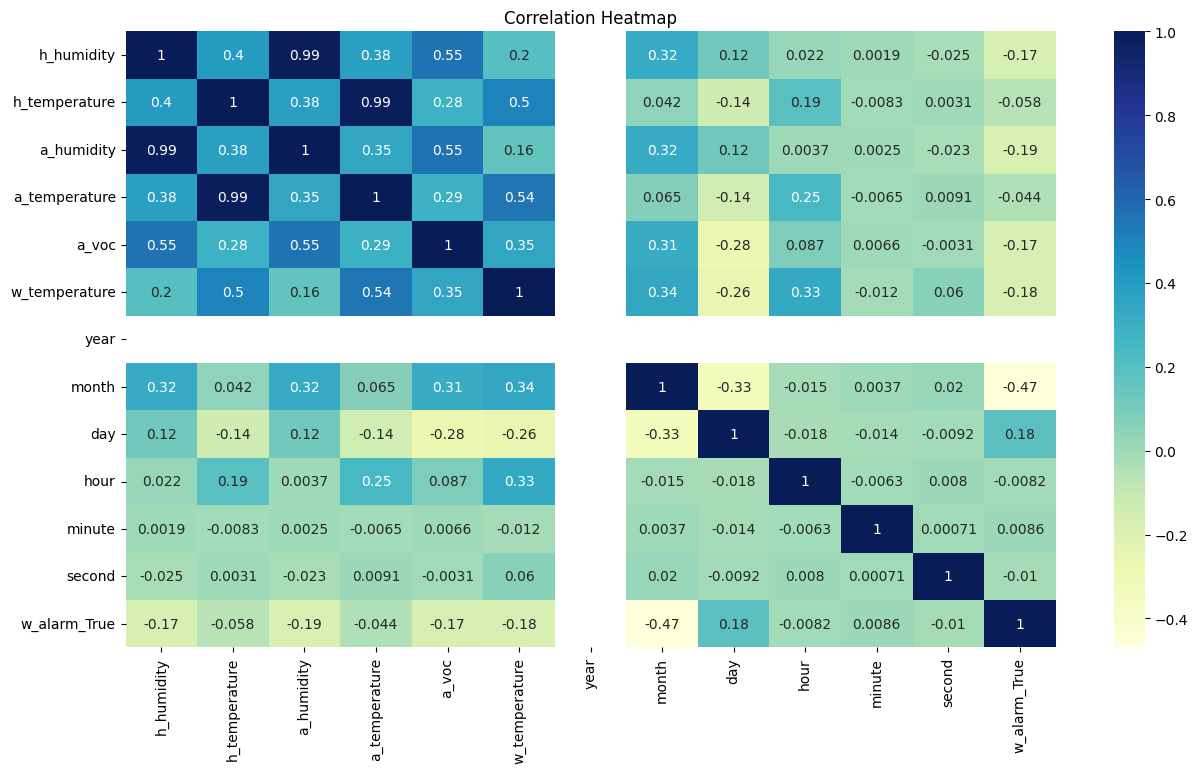

In [19]:
# Plotting
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()